<a href="https://colab.research.google.com/github/ColeAlves/DiceDetector/blob/master/DiceDector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3201223490879191962, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 18242200765551914485
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11008139847231568305
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14800692839
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8203739090674643644
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

The following code  is to retrieve the data from my google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the libraries needed for the project.

In [3]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
import matplotlib.pyplot as plt
import glob, os

#from shutil import copyfile

Using TensorFlow backend.


Showing a list of images from the folders to see if the code is extracting the images from the right folder.

base_A_dir = "/content/drive/My Drive"

print(os.path.isdir(base_A_dir))

!ls "/content/drive/My Drive/dicePictures/dicePhotos/aTrain"

In [0]:
def classificationImage(file):
  label_file = file.find('_')
  
  classifiers_label = {
      '001': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      '002': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      '003': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      '004': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      '005': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      '006': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      '007': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      '008': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      '009': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      '010': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      
      '011': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      '012': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      '013': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      '014': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      '015': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      '017': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      '018': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      '019': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      '020': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      '021': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      
      'bluedie1':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      'bluedie2':  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      'bluedie3':  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      'bluedie4':  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      'bluedie5':  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      'bluedie6':  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'bluedie7':  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      'bluedie8':  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      'bluedie9':  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      'bluedie10': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],      
  }
  
  #print(file[0 : label_file])
  return classifiers_label.get(file[0 : label_file], "error")
  
  

Opens the image and resizes it.  For demostration purposes

(150, 100, 3)


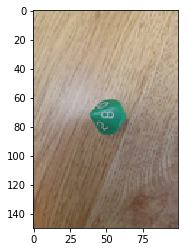

In [5]:
import cv2
from PIL import Image
import numpy
file = '/content/drive/My Drive/dicePictures/dicePhotos/Training2/013_000.jpg'
img = Image.open(file) #opens the file from the path name given from the variable file
img2 = img.resize((100,150), Image.ANTIALIAS)#resizes the img to 200 pizels x axis and 300 pixels y axis
plt.imshow(img2)

print(numpy.array(img2).shape)


The following code below gets the contents from the Training folder then does the following operations on the images.  

Opens the image after getting the file path of the image
Resizes the image to 200 by 300, so it takes less time to process as well as not crash given memory limitations
Reshapes the image to 200 x 300 x 3.  The 3 stands for 3 channels
Appends the image to an array to be stored in x_train, which will create a 4D tensor to be used for the CNN.  The dimensions of the tensor will be the (number of images, width, height, channels of image)

/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_001.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_002.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_003.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_004.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_012.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_013.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_010.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_014.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_015.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_016.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_024.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_025.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_018.jpg
/content/drive/My Drive/dicePictures/dicePhotos/Training2/001_019.jpg
/content/drive/My Dr

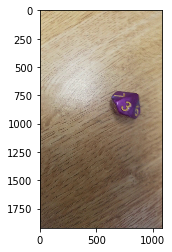

In [6]:
from skimage import io
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

base_dir_a = '/content/drive/My Drive/dicePictures/dicePhotos/Training2'

'''
import cv2
from PIL import Image
import numpy
file = '/content/drive/My Drive/dicePictures/dicePhotos/EightSideGreen/013_000.jpg'
img = Image.open(file) #opens the file from the path name given from the variable file
img2 = img.resize((100,150), Image.ANTIALIAS)#resizes the img to 100 pizels x axis and 150 pixels y axis
plt.imshow(img2)

print(numpy.array(img2).shape)  (150,100,3)
'''


all_images = []
y_train_array = []

for file in os.listdir(base_dir_a):
  file_path = base_dir_a + '/' + file  #concating the file path from the file and base_dir_a together 
  print(file_path)
  #img = io.imread(file_path)
  
  img = Image.open(file_path)
  img2 = img.resize((200, 300), Image.ANTIALIAS )#resizes the img to 100 pizels x axis and 150 pixels y axis
  #img = cv2.resize(img, (200, 300))
  #img = img.reshape([200, 300, 3])
  
  all_images.append(np.array(img2))
  temp = classificationImage(file)
  
  y_train_array.append(temp)
  #image_name = os.path.join(base_dir_a, file)#gets the path name from the file to the photos
  #images.append(image_name)#appends the path name to the images array
  
x_train = np.array(all_images)
tasdas = np.array(y_train_array)
plt.imshow(img)



#combined = (x_train, tasdas)
#print(combined)

In [7]:
y_train = np.array(y_train_array)
print(y_train[0])
print(y_train.shape)
print(x_train.shape)


[0 0 0 0 0 0 0 0 0 1]
(1059, 10)
(1059, 300, 200, 3)


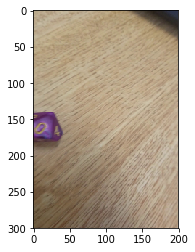

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4, :, :, :])

In [9]:
k = 4
num_val_samples = len(x_train) // k

print(len(y_train))

for ii in range(k):
  print('processing fold #', ii)
  val_data = x_train[ii * num_val_samples: (ii + 1) * num_val_samples]
  val_targets = y_train[ii * num_val_samples: (ii + 1) * num_val_samples]
  
  partial_train_data = np.concatenate(
    [x_train[:ii * num_val_samples],
    x_train[(ii + 1) * num_val_samples:]], axis = 0)
  
  partial_train_targets = np.concatenate(
    [y_train[:ii * num_val_samples],
    y_train[(ii + 1) * num_val_samples:]], axis = 0)



1059
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3



Need to categorize the x_train data into 10 categories based on the top number of the die 1 through 10.

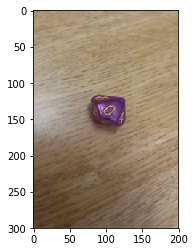

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1, :, :, :])

In [11]:
'''
temp1 = []#array that opens the images
temp2 = []#array that resizes the images to 200 by 300
temp3 = []#array that appends the entire list of photos that has been resized

for image in images:
  temp1 = Image.open(image)
  temp2 = temp1.resize((200,300),Image.ANTIALIAS)
  temp3.append(temp2)
'''
#plt.imshow(temp3[0])  

'\ntemp1 = []#array that opens the images\ntemp2 = []#array that resizes the images to 200 by 300\ntemp3 = []#array that appends the entire list of photos that has been resized\n\nfor image in images:\n  temp1 = Image.open(image)\n  temp2 = temp1.resize((200,300),Image.ANTIALIAS)\n  temp3.append(temp2)\n'

In [12]:
'''
image_name = []
images = []
for file in os.listdir(base_dir_a):
  image_name = os.path.join(base_dir_a, file)#gets the path name from the file to the photos
  images.append(image_name)#appends the path name to the images array
#print(images[7]) #/content/drive/My Drive/dicePictures/dicePhotos/EightSideGreen/013_008.jpg

temp1 = []#array that opens the images
temp2 = []#array that resizes the images to 200 by 300
temp3 = []#array that appends the entire list of photos that has been resized
base_dir_save = '/content/drive/My Drive/dicePictures/dicePhotos/Running'

for image in images:
  temp1 = Image.open(image)
  temp2 = temp1.resize((200,300),Image.ANTIALIAS)
  temp3.append(temp2)
#copy2(temp1[0], base_dir_save)
'''
#plt.imshow(temp3[0])
#print(temp3[:])

"\nimage_name = []\nimages = []\nfor file in os.listdir(base_dir_a):\n  image_name = os.path.join(base_dir_a, file)#gets the path name from the file to the photos\n  images.append(image_name)#appends the path name to the images array\n#print(images[7]) #/content/drive/My Drive/dicePictures/dicePhotos/EightSideGreen/013_008.jpg\n\ntemp1 = []#array that opens the images\ntemp2 = []#array that resizes the images to 200 by 300\ntemp3 = []#array that appends the entire list of photos that has been resized\nbase_dir_save = '/content/drive/My Drive/dicePictures/dicePhotos/Running'\n\nfor image in images:\n  temp1 = Image.open(image)\n  temp2 = temp1.resize((200,300),Image.ANTIALIAS)\n  temp3.append(temp2)\n#copy2(temp1[0], base_dir_save)\n"

Convolution neural network
importing Keras libraries and packages

In [0]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils  import to_categorical

The primary purpose of Convolution is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

In [14]:
print(y_train.shape)
#y_train_cate = to_categorical( y_train, 10)
#print(y_train_cate.shape)
print(x_train[0:,:,:].shape)

x_train = x_train.astype('float32')/255
partial_train_data = partial_train_data.astype('float32')/255

(1059, 10)
(1059, 300, 200, 3)


[[0.67058825 0.67058825 0.67058825 0.6862745  0.6862745 ]
 [0.6784314  0.6784314  0.6862745  0.69411767 0.6862745 ]
 [0.68235296 0.68235296 0.68235296 0.6745098  0.65882355]
 [0.6509804  0.65882355 0.65882355 0.6392157  0.6392157 ]
 [0.64705884 0.654902   0.64705884 0.6509804  0.67058825]]


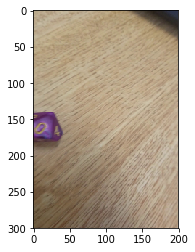

In [15]:
print(x_train[0, :5, :5, 0])
import matplotlib.pyplot as plt
plt.imshow(x_train[4, :, :, :])

In [16]:
#initialize the CNN
model = Sequential()

#step 1 convolution
model.add(Conv2D(filters = 28, kernel_size = 7, input_shape = x_train[0,:,:,:].shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 8, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 10, kernel_size = 5, activation = 'sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))


#flattening
model.add( Flatten() )
#full connection
model.add(Dense(64, activation = 'sigmoid'))
#classifier.add(Dropout(0.2))
model.add(Dense (10, activation = 'softmax') )

#compling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 294, 194, 28)      4144      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 147, 97, 28)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 143, 93, 8)        5608      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 46, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 42, 10)        2010      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 33, 21, 10)        0         
_________________________________________________________________
flat

The training time took around 200 to 300 seconds to run 100 epochs

In [17]:
history = model.fit(partial_train_data, partial_train_targets, epochs = 100, batch_size = 50, validation_data = ( partial_train_data,  partial_train_targets))

Instructions for updating:
Use tf.cast instead.
Train on 795 samples, validate on 795 samples
Epoch 1/100
795/795 [==============================] - 6s 7ms/step - loss: 2.6369 - acc: 0.1132 - val_loss: 2.3232 - val_acc: 0.1723
Epoch 2/100
795/795 [==============================] - 2s 3ms/step - loss: 2.2889 - acc: 0.1723 - val_loss: 2.2564 - val_acc: 0.1836
Epoch 3/100
795/795 [==============================] - 2s 3ms/step - loss: 2.2595 - acc: 0.1723 - val_loss: 2.2497 - val_acc: 0.2025
Epoch 4/100
795/795 [==============================] - 2s 3ms/step - loss: 2.2544 - acc: 0.1824 - val_loss: 2.2598 - val_acc: 0.1723
Epoch 5/100
795/795 [==============================] - 2s 3ms/step - loss: 2.2510 - acc: 0.1862 - val_loss: 2.2394 - val_acc: 0.2088
Epoch 6/100
795/795 [==============================] - 2s 3ms/step - loss: 2.2392 - acc: 0.1975 - val_loss: 2.2315 - val_acc: 0.2126
Epoch 7/100
795/795 [==============================] - 2s 3ms/step - loss: 2.2241 - acc: 0.1987 - val_loss: 

Evaluate the model on the test validation set¶


In [18]:
validation_loss, validation_acc = model.evaluate( partial_train_data, partial_train_targets )
print( 'validation_acc:', validation_acc )


795/795 [==============================] - 1s 1ms/step
validation_acc: 1.0


An example of what the model has predicted and comparison with the true classes



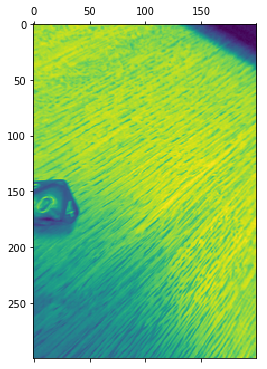

[[[0.7137255  0.6431373  0.5058824 ]
  [0.7137255  0.6431373  0.5019608 ]
  [0.7176471  0.64705884 0.5058824 ]
  ...
  [0.7490196  0.6784314  0.5254902 ]
  [0.74509805 0.6784314  0.5176471 ]
  [0.7372549  0.6784314  0.50980395]]

 [[0.69803923 0.61960787 0.49411765]
  [0.69411767 0.6156863  0.49019608]
  [0.69411767 0.6156863  0.4862745 ]
  ...
  [0.7372549  0.67058825 0.5019608 ]
  [0.7411765  0.6784314  0.5137255 ]
  [0.7490196  0.6745098  0.52156866]]

 [[0.6862745  0.6039216  0.48235294]
  [0.68235296 0.6        0.47843137]
  [0.6862745  0.6039216  0.48235294]
  ...
  [0.6862745  0.6117647  0.43529412]
  [0.70980394 0.63529414 0.47058824]
  [0.7294118  0.6431373  0.49411765]]

 ...

 [[0.41568628 0.3529412  0.29411766]
  [0.42352942 0.36078432 0.30588236]
  [0.42352942 0.36078432 0.3137255 ]
  ...
  [0.61960787 0.54901963 0.4745098 ]
  [0.62352943 0.5529412  0.4745098 ]
  [0.6156863  0.5411765  0.46666667]]

 [[0.40392157 0.34509805 0.27450982]
  [0.39607844 0.3372549  0.2784314 ]


In [19]:
plt.matshow( partial_train_data[4, :, :, 0])
plt.show()
print( partial_train_data[10] )

Visualizing the predictions predictions on the unseen data - this is going to show us how the model is predicting the images
The output is an array of values where each value is associated to a digit

In [20]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})

predictions = model.predict( partial_train_data )
print( predictions[0] )

[0.0004751 0.0016062 0.0019494 0.0024077 0.0002387 0.0006859 0.0000798
 0.0001721 0.0000390 0.9923460]


After rounding we can see the output of the prediction



In [21]:
print( predictions[0].round() )


[0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 0.0000000 0.0000000 1.0000000]
